# Lab 1: Linear Regression and Overfitting

### Machine Learning and Pattern Recognition, September 2015

* The lab exercises should be made in groups of two or three people.
* The deadline is sunday September 20, 23:59.
* Assignment should be sent to Philip Versteeg. (p.j.j.p.versteeg@uva.nl) The subject line of your email should be "\#lab\_lastname1\_lastname2\_lastname3".
* Put your and your teammates' names in the body of the email
* Attach the .IPYNB (IPython Notebook) file containing your code and answers. Naming of the file follows the same rule as the subject line. For example, if the subject line is "lab01\_Kingma\_Hu", the attached file should be "lab01\_Kingma\_Hu.ipynb". Only use underscores ("\_") to connect names, otherwise the files cannot be parsed.
* Make sure we can run your notebook / scripts!

Notes on implementation:

* You should write your code and answers in this IPython Notebook: http://ipython.org/notebook.html. If you have problems, please contact me.
* Please write your answers right below the questions.
* Among the first lines of your notebook should be "%pylab inline". This imports all required modules, and your plots will appear inline.
* Refer to last week's lab notes, i.e. http://docs.scipy.org/doc/, if you are unsure about what function to use. There are different correct ways to implement each problem!
* For this lab, your regression solutions should be in closed form, i.e., should not perform iterative gradient-based optimization but find the exact optimum directly.

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

## Part 1: Polynomial Regression

### 1.1. Generate sinusoidal data (5 points)
Write a method `gen_sinusoidal(N)` that generates toy data like in fig 1.2 of the MLPR book. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from 0 to (including) 2$\pi$, and the elements $t_i$ of $\bt$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $\bf{x}$, the mean $\mu_i = sin(x_i)$ and the standard deviation $\sigma = 0.2$.


In [1]:
%pylab inline
import numpy as np
def gen_sinusoidal(N):
    x = np.linspace(0,2*np.pi,N)
    sigma = 0.2
    t = np.zeros(N)
    R = []
    for i in range(N):
        t[i] = np.random.normal(np.sin(x[i]),sigma*sigma)
        R.append([x[i], t[i]])
    return R
    

Populating the interactive namespace from numpy and matplotlib


### 1.2 Polynomial regression (15 points)

Write a method `fit_polynomial(x, t, M)` that finds the maximum-likelihood solution of an _unregularized_ $M$-th order polynomial for some dataset `x`. The error function to minimize w.r.t. $\bw$ is:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$

where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in the MLPR book at section 3.1.1, $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates. 

In [2]:
import numpy as np
def fit_polynomial(x, t, M):
    N = len(x)
    Phi = np.zeros((N,M+1))
    for i in range(M+1):
        xi = np.power(x,i)
        Phi[:,i] = np.transpose(xi)
    PhiT = np.transpose(Phi)
    w = np.dot(np.dot(np.linalg.inv(np.dot(PhiT,Phi)),PhiT),t)
    return w


### 1.3 Plot (5 points)
Sample a dataset with $N=9$, and fit four polynomials with $M \in (0, 1, 3, 9)$.
For each value of $M$, plot the prediction function, along with the data and the original sine function. The resulting figure should look similar to fig 1.4 of the MLPR book. Note that you can use matplotlib's `plt.pyplot(.)` functionality for creating grids of figures.

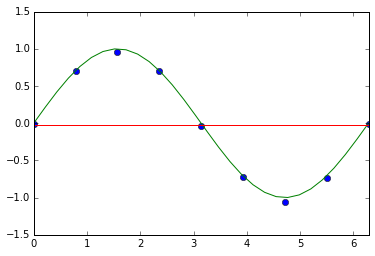

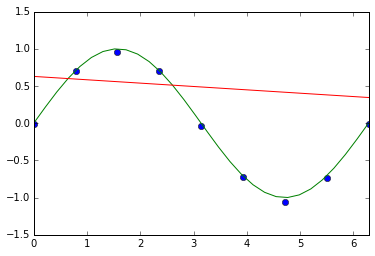

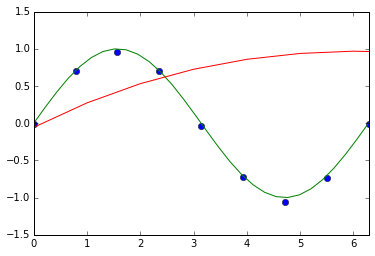

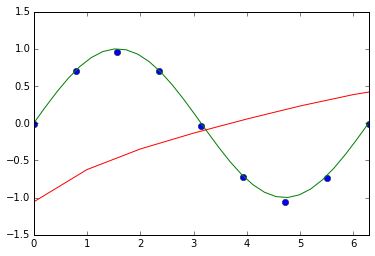

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def gen_sinusoidal(N):
    x = np.linspace(0,2*np.pi,N)
    sigma = 0.2
    t = np.zeros(N)
    R = []
    for i in range(N):
        t[i] = np.random.normal(np.sin(x[i]),sigma*sigma)
        R.append([x[i], t[i]])
    return R
def fit_polynomial(x, t, M):
    N = len(x)
    Phi = np.zeros((N,M+1))
    for i in range(M+1):
        xi = np.power(x,i)
        Phi[:,i] = np.transpose(xi)
    PhiT = np.transpose(Phi)
    w = np.dot(np.dot(np.linalg.inv(np.dot(PhiT,Phi)),PhiT),t)
    return w    
N = 9
M = [0,1,3,9]    
k = gen_sinusoidal(N)
x = np.zeros(N)
t = np.zeros(N)
for i in range(N):
    x[i] = k[i][0]
    t[i] = k[i][1]
s = np.linspace(0,2*np.pi,30)
for j in M:
    w = fit_polynomial(x,t,j)
    plt.figure(j)
    plt.axis([0.0,2*np.pi,-1.5,1.5])
    plt.plot(x,t,"o")
    plt.plot(s,np.sin(s))
    p = np.poly1d(w)
    plt.plot(np.polynomial.polynomial.polyval(s,p))


### 1.4 Regularized linear regression (10 points)

Write a method `fit_polynomial_reg(x, t, M, lamb)` that fits a _regularized_ $M$-th order polynomial to the sinusoidal data, as discussed in the lectures, where `lamb` is the regularization term _lambda_. (Note that 'lambda' cannot be used as a variable name in Python since it has a special meaning). The error function to minimize w.r.t. $\bw$:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$

For background, see section 3.1.4 of the MLPR book.

In [4]:
import numpy as np
def fit_polynomial_reg(x, t, M, lamb):
    N = len(x)
    Phi = np.zeros((N,M+1))
    eye = np.identity(M+1)
    for i in range(M+1):
        xi = np.power(x,i)
        Phi[:,i] = np.transpose(xi)
    PhiT = np.transpose(Phi)
    w = np.dot(np.dot(np.linalg.inv(lamb*eye + np.dot(PhiT,Phi)),PhiT),t)
    return w






### 1.5 Model selection by cross-validation (10 points)
Use cross-validation to find a good choice of $M$ and $\lambda$, given a dataset of $N=9$ datapoints generated with `gen_sinusoidal(9)`. You should write a function that tries (loops over) a reasonable range of choices of $M$ and $\lambda$, and returns the choice with the best cross-validation error. In this case you can use $K=9$ folds, corresponding to _leave-one-out_ crossvalidation.

You can let $M \in (0, 1, ..., 10)$, and let $\lambda \in (e^{-10}, e^{-9}, ..., e^{0})$.

To get you started, here's a method you can use to generate indices of cross-validation folds.

In [5]:
import numpy as np

def gen_sinusoidal(N):
    x = np.linspace(0,2*np.pi,N)
    sigma = 0.2
    t = np.zeros(N)
    R = []
    for i in range(N):
        t[i] = np.random.normal(np.sin(x[i]),sigma*sigma)
        R.append([x[i], t[i]])
    return R

def fit_polynomial_reg(x, t, M, lamb):
    N = len(x)
    Phi = np.zeros((N,M+1))
    eye = np.identity(M+1)
    for i in range(M+1):
        xi = np.power(x,i)
        Phi[:,i] = np.transpose(xi)
    
    PhiT = np.transpose(Phi)
    w = np.dot(np.dot(np.linalg.inv(lamb*eye + np.dot(PhiT,Phi)),PhiT),t)
    Err = (1./2.)*np.dot(np.transpose(np.dot(Phi,w)-t),(np.dot(Phi,w)-t)) + (lamb/2.)*(np.dot(np.transpose(w),w))

    return w,Err

def kfold_indices(N, k):
    all_indices = np.arange(N,dtype=int)
    np.random.shuffle(all_indices)
    idx = np.floor(np.linspace(0,N,k+1))
    train_folds = []
    valid_folds = []
    for fold in range(k):
        valid_indices = all_indices[idx[fold]:idx[fold+1]]
        valid_folds.append(valid_indices)
        train_folds.append(np.setdiff1d(all_indices, valid_indices))
    return train_folds, valid_folds

def crossvalid(N,K):

    sinx = gen_sinusoidal(N)
    M = range(11)
    x = np.zeros(N)
    t = np.zeros(N)
    for i in range(N):
        x[i] = sinx[i][0]
        t[i] = sinx[i][1]
    lambs = range(11)
    train,valid = kfold_indices(N,K)
    minerr = []
    for i in M:
        for j in lambs:
            for h in range(K):
                itx = []
                itt = []
                kerr = 0
                for l in train[h]:
                    itx.append(x[l])
                    itt.append(t[l]) 
                w,err = fit_polynomial_reg(itx,itt,i,np.exp(-j))
                kerr = kerr + err
            iterr = kerr/K
            
            if minerr == []:
                minerr = [iterr,i,j]
            else:
                if iterr < minerr[0]:
                    minerr = [iterr,i,j]

    return minerr


Create a comprehensible plot of the cross-validation error for each choice of $M$ and $\lambda$. Highlight the best choice. 

_Question_: Explain over-fitting and underfitting, illuminated by your plot. Explain the relationship with model bias and model variance.

Answer: Over-fitting is the effect of overtraining your model to approximate a non-linear function like sinus in this case. As we can see in the plot for M = 9, the model learns the noise of the training data making fit perfectly to this data but new data points would be missrepresented with this model. Underfitting is the oposite problem, polynomials with lower degree (as we can see for M = 0,1; are not sufficient to fit the training data. Related to model bias and variance, bias is error consequence of wrong assumptions during the learning process, missing important relationships beteween the training data; an underfit model will have high bias. Variance is the measure of how spread out are the training points, high variance in the training data can cause overfitting.

### 1.6 Plot best cross-validated fit (5 points)

For some dataset with $N = 9$, plot the model with the optimal $M$ and $\lambda$ according to the cross-validation error, using the method you just wrote. Let the plot make clear which $M$ and $\lambda$ were found.

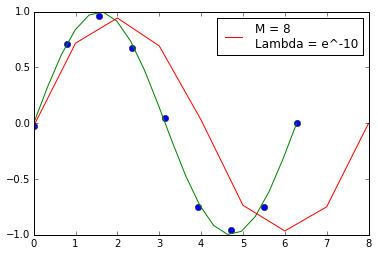

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def gen_sinusoidal(N):
    x = np.linspace(0,2*np.pi,N)
    sigma = 0.2
    t = np.zeros(N)
    R = []
    for i in range(N):
        t[i] = np.random.normal(np.sin(x[i]),sigma*sigma)
        R.append([x[i], t[i]])
    return R

def fit_polynomial_reg(x, t, M, lamb):
    N = len(x)
    Phi = np.zeros((N,M+1))
    eye = np.identity(M+1)
    for i in range(M+1):
        xi = np.power(x,i)
        Phi[:,i] = np.transpose(xi)
    
    PhiT = np.transpose(Phi)
    w = np.dot(np.dot(np.linalg.inv(lamb*eye + np.dot(PhiT,Phi)),PhiT),t)
    Err = (1./2.)*np.dot(np.transpose(np.dot(Phi,w)-t),(np.dot(Phi,w)-t)) + (lamb/2.)*(np.dot(np.transpose(w),w))

    return w,Err

def kfold_indices(N, k):
    all_indices = np.arange(N,dtype=int)
    np.random.shuffle(all_indices)
    idx = np.floor(np.linspace(0,N,k+1))
    train_folds = []
    valid_folds = []
    for fold in range(k):
        valid_indices = all_indices[idx[fold]:idx[fold+1]]
        valid_folds.append(valid_indices)
        train_folds.append(np.setdiff1d(all_indices, valid_indices))
    return train_folds, valid_folds

def crossvalid(N,K):

    sinx = gen_sinusoidal(N)
    M = range(11)
    x = np.zeros(N)
    t = np.zeros(N)
    for i in range(N):
        x[i] = sinx[i][0]
        t[i] = sinx[i][1]
    lambs = range(11)
    train,valid = kfold_indices(N,K)
    minerr = []
    for i in M:
        for j in lambs:
            for h in range(K):
                itx = []
                itt = []
                kerr = 0
                for l in train[h]:
                    itx.append(x[l])
                    itt.append(t[l]) 
                w,err = fit_polynomial_reg(itx,itt,i,np.exp(-j))
                kerr = kerr + err
            iterr = kerr/K
            
            if minerr == []:
                minerr = [iterr,i,j]
            else:
                if iterr < minerr[0]:
                    minerr = [iterr,i,j]

    
    w,err = fit_polynomial_reg(x,t,minerr[1],np.exp(-minerr[2]))
    s = np.linspace(0,2*np.pi,20)
   
    plt.plot(x,t,"o")
    plt.plot(s,np.sin(s))
    p = np.poly1d(w)
    plt.plot(np.polynomial.polynomial.polyval(x,p),label='M = ' + str(minerr[1]) + '\nLambda = e^-'  + str(minerr[2]))
    plt.legend()
    return minerr
    

x = crossvalid(9,9)


## Part 2: Bayesian Linear (Polynomial) Regression

### 2.1 Sinusoidal data 2 (5 points)

Write a function `gen_sinusoidal2(N)` that behaves identically to `gen_sinusoidal(N)` except that the generated values $x_i$ are not linearly spaced, but drawn from a uniform distribution between $0$ and $2 \pi$.

In [7]:
import numpy as np
def gen_sinusoidal2(N):
    x = np.random.uniform(0,2*np.pi,N)
    x = sorted(x)
    sigma = 0.2
    t = np.zeros(N)
    for i in range(N):                            
        t[i] = np.random.normal(np.sin(x[i]),sigma*sigma) 
    return x,t

### 2.2 Compute Posterior (15 points)

You're going to implement a Bayesian linear regression model, and fit it to the sinusoidal data. Your regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(\bw \;|\; \alpha) = \mathcal{N}(\bw \;|\; 0, \alpha^{-1} \bI)$$

The covariance and mean of the posterior are given by:

$$\bS_N= \left( \alpha \bI + \beta \bPhi^T \bPhi \right)^{-1} $$
$$\bm_N = \beta\; \bS_N \bPhi^T \bt$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 
See MLPR chapter 3.3 for background.

Write a method `fit_polynomial_bayes(x, t, M, alpha, beta)` that returns the mean $\bm_N$ and covariance $\bS_N$ of the posterior for a $M$-th order polynomial, given a dataset, where `x`, `t` and `M` have the same meaning as in question 1.2.

In [8]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
    Phi = np.zeros((N,M+1))
    for i in range(M+1):
        xi = np.power(x,i)
        Phi[:,i] = np.transpose(xi)
    PhiT = np.transpose(Phi)
    I=np.identity(M+1)
    S=np.linalg.inv(np.dot(alpha,I)+np.dot(beta,np.dot(PhiT,Phi)))
    m=np.dot(beta,np.dot(S,np.dot(PhiT,t)))
    return S, m

### 2.3 Prediction (10 points)

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; \bx, \bt, \alpha, \beta) = \mathcal{N}(t \;|\; \bm_N^T \phi(\bx), \sigma_N^2(\bx))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(\bx)^T \bS_N \phi(\bx) $$

where $\phi(\bx)$ are the computed features for a new datapoint $\bx$, and $t$ is the predicted variable for datapoint $\bx$. 

Write a function that `predict_polynomial_bayes(x, m, S, beta)` that returns the predictive mean and variance given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [1]:
def predict_polynomial_bayes(x, m, S, beta):
    Phi=np.zeros(M+1)
    for i in range(M+1):
        Phi[i]=np.power(x,i)
    pred_m=np.dot(np.transpose(m),Phi)
    PhiT=np.transpose(Phi)
    pred_S=1/beta+ np.dot( np.dot(PhiT,S),Phi)
    return pred_S, pred_m

### 2.4 Plot predictive distribution (10 points)

a) (5 points) Generate 7 datapoints with `gen_sinusoidal2(7)`. Compute the posterior mean and covariance for a Bayesian polynomial regression model with $M=5$, $\alpha=\frac{1}{2}$ and $\beta=\frac{1}{0.2^2}$.
Plot the Bayesian predictive distribution, where you plot (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and a 1-sigma predictive variance using `plt.fill_between(..., alpha=0.1)` (the alpha argument induces transparency).

Include the datapoints in your plot.

b) (5 points) For a second plot, draw 100 samples from the parameters' posterior distribution. Each of these samples is a certain choice of parameters for 5-th order polynomial regression. 
Display each of these 100 polynomials.

In [6]:
import matplotlib.pyplot as plt

import numpy as np
def gen_sinusoidal2(N):
    x = np.random.uniform(0,2*np.pi,N)
    x = sorted(x)
    sigma = 0.2
    t = np.zeros(N)
    for i in range(N):                            
        t[i] = np.random.normal(np.sin(x[i]),sigma*sigma) 
    return x,t
       
def fit_polynomial_bayes(x, t, M, alpha, beta):
    Phi = np.zeros((N,M+1))
    for i in range(M+1):
        xi = np.power(x,i)
        Phi[:,i] = np.transpose(xi)
    PhiT = np.transpose(Phi)
    I=np.identity(M+1)
    S=np.linalg.inv(np.dot(alpha,I)+np.dot(beta,np.dot(PhiT,Phi)))
    m=np.dot(beta,np.dot(S,np.dot(PhiT,t)))
    return S, m

def predict_polynomial_bayes(x, m, S, beta):
    Phi=np.zeros(M+1)
    for i in range(M+1):
        Phi[i]=np.power(x,i)
    pred_m=np.dot(np.transpose(m),Phi)
    PhiT=np.transpose(Phi)
    pred_S=1/beta+ np.dot( np.dot(PhiT,S),Phi)
    return pred_S, pred_m

N=7
x,t=gen_sinusoidal2(N)
M=5
alpha=0.5
beta=1/np.power(0.2,2)
S,m=fit_polynomial_bayes(x, t, M, alpha, beta)
print S.shape
print S
pred_m=[]
pred_S=[]
for i in range(N):
    x_pred_S,x_pred_m=predict_polynomial_bayes(x[i], m, S, beta)
    pred_m.append(x_pred_m)
    pred_S.append(x_pred_S)       
    
figure = plt.figure()
plt.plot(x, t, "o")
plt.plot(x, np.sin(x))
plt.plot(x, pred_m)

up=np.array(pred_S)+np.array(pred_m)
down=np.array(pred_m)-np.array(pred_S)
plt.fill_between(x,up,down,alpha=0.1)
print up,down
D=np.linspace(0,2*np.pi,50)
figure=plt.figure()
for i in range(100):
    x,t=gen_sinusoidal2(7)
    S,m=fit_polynomial_bayes(x, t, 5,alpha,beta)
    plt.plot(D,[np.polynomial.polynomial.polyval(point,m) for point in D])

plt.axis([0.0,2*np.pi,-5,5])
plt.plot(D,[np.sin(point) for point in D])
    

(6, 6)
[[  9.38938610e-01  -7.86360640e-01  -2.12558857e-01   2.80533817e-01
   -6.87981136e-02   5.18593805e-03]
 [ -7.86360640e-01   1.19439672e+00  -5.46532744e-01   9.11711413e-02
   -2.84009823e-03  -3.62157232e-04]
 [ -2.12558857e-01  -5.46532744e-01   1.14610004e+00  -5.89229537e-01
    1.17036581e-01  -8.05089798e-03]
 [  2.80533817e-01   9.11711413e-02  -5.89229537e-01   3.44755154e-01
   -7.22056480e-02   5.11888005e-03]
 [ -6.87981136e-02  -2.84009823e-03   1.17036581e-01  -7.22056480e-02
    1.54591625e-02  -1.11087725e-03]
 [  5.18593805e-03  -3.62157232e-04  -8.05089798e-03   5.11888005e-03
   -1.11087725e-03   8.05548879e-05]]
[ 1.00418684  0.06864583 -0.39126674 -0.90027154 -0.98108009 -0.97405966
 -0.61544915] [ 0.84665158 -0.06250934 -0.50825233 -1.00760006 -1.0905298  -1.08751919
 -0.77394618]


### 2.5 Additional questions (10 points)

a) (5 points) Why is $\beta=\frac{1}{0.2^2}$ the best choice of $\beta$ in section 2.4?

b) (5 points) In the case of Bayesian linear regression, both the posterior of the parameters $p(\bw \;|\; \bt, \alpha, \beta)$ and the predictive distribution $p(t \;|\; \bw, \beta)$ are Gaussian. In consequence (and conveniently), $p(t \;|\; \bt, \alpha, \beta)$ is also Gaussian (See MLPR section 3.3.2 and homework 2 question 4). This is actually one of the (rare) cases where we can make Bayesian predictions without resorting to approximative methods.

Suppose you have to work with some model $p(t\;|\;x,\bw)$ with parameters $\bw$, where the posterior distribution $p(\bw\;|\;\mathcal{D})$ given dataset $\mathcal{D}$ can not be integrated out when making predictions, but where you can still generate samples from the posterior distribution of the parameters. Explain how you can still make approximate Bayesian predictions using samples from the parameters' posterior distribution.

In [11]:
a) 1/beta is the noise precision of the data or variance of the noise. Since our data is generated by a Gaussian model with 0.2 
variance it is best to choose this value.

SyntaxError: invalid syntax (<ipython-input-11-5a60dbb11fcb>, line 1)

In [ ]:
b) We can use the samples to compute the mean and variance for posterior distribution and map the data samples to a Gaussian 
distribution.